In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

Testing Manned and Unmanned Systems

1. Read in component data from excel file

In [2]:
# initializing system components from excel file
import pandas as pd
import openpyxl

data= pd.read_excel("AuxilaryPropulsionPlant_Reliability_Availability_Data.xlsx")
print(data)
indexed_data= data.set_index('Component')   # indexing the data by component name so it can be searched easily
print(indexed_data)

                Component    MTBF MTTR      R      A
0           Diesel Engine    8000    8  0.999  0.999
1                  Clutch   50000   NR  0.986  1.000
2          Reduction Gear  200000   NR  0.996  1.000
3      Shaft and Bearings  200000   NR  0.996  1.000
4          CRP Propellers   25000   15  0.999  0.999
5          Fuel Oil Motor    7500   18  0.998  0.997
6           Fuel Oil Pump    5500  4.5  0.999  0.999
7       Fuel Oil Purifier   10000    4  1.000  0.999
8          Lube Oil Motor    7500  7.8  0.999  0.998
9           Lube Oil Pump    4000    5  0.999  0.998
10      Jacket Water Pump   27000  7.6  0.999  0.999
11       Fresh Water Pump   12500   12  0.999  0.999
12  Fuel Oil Booster Pump    5500  4.5  0.999  0.999
                         MTBF MTTR      R      A
Component                                       
Diesel Engine            8000    8  0.999  0.999
Clutch                  50000   NR  0.986  1.000
Reduction Gear         200000   NR  0.996  1.000
Shaft and Bea

2. Initialize Sensed Components from Excel Data

In [5]:
# default parameters
comp_states = {0: 'failed', 
                 1: 'working'}
sensor_accuracy = 0.95
n = 3   # number of sensors

# intializing each component as a sensed Comp
sensed_components = []
for comp in data.Component:
    MTTF = indexed_data.loc[comp, 'MTBF']
    MTTR = indexed_data.loc[comp, 'MTTR']
    comp = SensedComp(sensor_accuracy, n, comp, comp_states, MTTF, MTTR)
    sensed_components.append(comp)

print([sensed_components[i].name for i in range(len(sensed_components))])

['Sensed Diesel engine', 'Sensed Clutch', 'Sensed Reduction gear', 'Sensed Shaft and bearings', 'Sensed Crp propellers', 'Sensed Fuel oil motor', 'Sensed Fuel oil pump', 'Sensed Fuel oil purifier', 'Sensed Lube oil motor', 'Sensed Lube oil pump', 'Sensed Jacket water pump', 'Sensed Fresh water pump', 'Sensed Fuel oil booster pump']


3. Add the sensed components to a manned or unmanned system

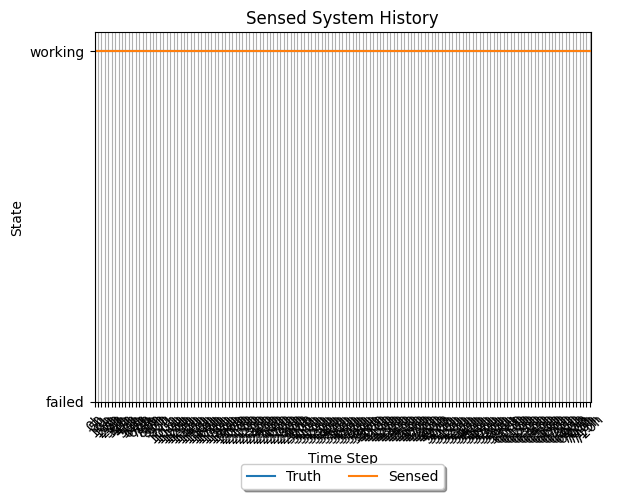

In [4]:
unmanned = False
sys = System('sys 1', sensed_components, None, unmanned)
            # print(sys.comps[0].comp.transition_matrix)
sys.simulate(720)
sys.plotHistory()